# Introducción a Redes Complejas en Biología de Sistemas

## Trabajo Computacional 1

### Ejercicio 4

<b>Asortatividad</b> <br>
a. Considere la red de colaboraciones científicas (netscience.gml) y la red de internet (asjuly06.gml). Analice si nodos de alto grado tienden a conectarse con nodos de alto grado o por el contrario suelen conectarse a nodos de bajo grado (i.e la red es asortativa o disortativa respecto al grado).

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [3]:
#Se cargan los archivos

nts = nx.read_gml('.\\tc01_data\\netscience.gml')
#nx.draw(nts, node_size=1)

jly = nx.read_gml('.\\tc01_data\\as-22july06.gml')
#nx.draw(jly)

In [4]:
#Se generan dos listas, una con grados de nodos y otra con grado promedio de vecinos
def degreeArray(Graph):
    '''Se genera un array con grados de nodos y grado promedio de vecinos'''
    degreeList = [node for node in Graph.degree()]
    neighbourList = list(((nx.average_neighbor_degree(Graph)).items()))
    Array = [(i[1],j[1]) for i,j in zip(degreeList,neighbourList)]
    Array.sort(key=lambda tup: tup[0])
    return Array

In [5]:
def averageDegree(Array, bins=1):
    '''Se obtiene un array de grado de nodo y promedio de grado de vecinos para nodos de ese grado. Se añade la opción de
    trabajar con un bineado lineal'''

    maxDegree=max([k[0] for k in Array])
    averageDegrees=[]
    for k in range(1,maxDegree+1):
        k_list = [item[1] for item in Array if item[0]==k]
        if k_list:
            mean = np.mean(k_list)
            averageDegrees.append((k,mean))
            
    #Procedemos al binning
    Binned_array = []
    for i in range(0,len(averageDegrees)-bins,bins):
        Binned_array.append((np.mean([k[0] for k in averageDegrees[i:i+bins]]), np.mean([k[1] for k in averageDegrees[i:i+bins]])))
    
    return Binned_array

In [6]:
#Se generan los datos para graficar ambas redes
jly_averageDegrees = averageDegree(degreeArray(jly),10)
nts_averageDegrees = averageDegree(degreeArray(nts),2)

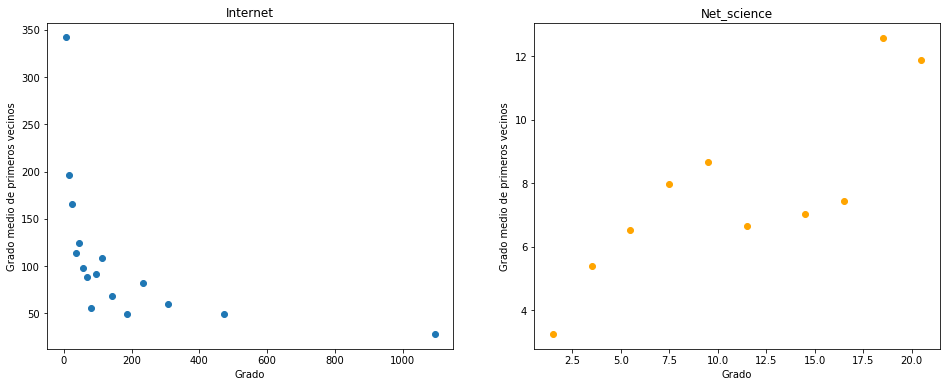

In [7]:
#Se grafica el grado promedio de vecinos versus grado de nodo
plt.rcParams['figure.figsize'] = (16,6)

plt.subplot(121)
jly_x=[k[0] for k in jly_averageDegrees]
jly_y=[k[1] for k in jly_averageDegrees]
plt.scatter(jly_x, jly_y)

plt.title('Internet')
plt.xlabel('Grado')
plt.ylabel('Grado medio de primeros vecinos')

plt.subplot(122)
nts_x=[k[0] for k in nts_averageDegrees]
nts_y=[k[1] for k in nts_averageDegrees]
plt.scatter(nts_x, nts_y, c="orange")

plt.title('Net_science')
plt.xlabel('Grado')
plt.ylabel('Grado medio de primeros vecinos')

plt.show()

Se observa que la red de internet (izquierda) sigue una tendencia que se asemeja a una exponencial decreciente. La red de colaboraciones científicas (derecha), por su parte, parece seguir una tendencia exponencial creciente. 

Se proceció a linealizar ambas funciones y a ajustar sendas líneas de tendencia. Se utilizó para esto la función polyfit del paquete Numpy.

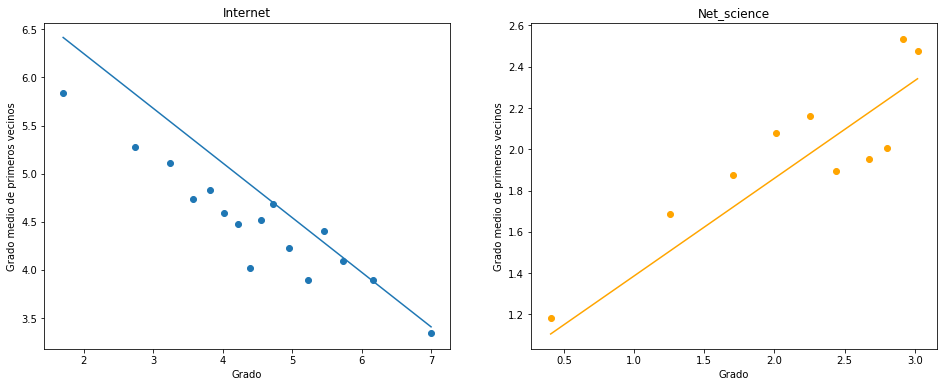

In [8]:
#grafico grado promedio de vecinos vs grado de nodo en log-log
plt.rcParams['figure.figsize'] = (16,6)

plt.subplot(121)
jly_x=np.log(np.array([k[0] for k in jly_averageDegrees]))
jly_y=np.log(np.array([k[1] for k in jly_averageDegrees]))
jly_fit = np.polyfit(jly_x, jly_y, 1)
plt.scatter(jly_x, jly_y)
plt.plot(np.linspace(min(jly_x),max(jly_x),1000),np.linspace(0,max(jly_x),1000)*jly_fit[0]+jly_fit[1])

plt.title('Internet')
plt.xlabel('Grado')
plt.ylabel('Grado medio de primeros vecinos')

plt.subplot(122)
nts_x=np.log(np.array([k[0] for k in nts_averageDegrees]))
nts_y=np.log(np.array([k[1] for k in nts_averageDegrees]))
nts_fit = np.polyfit(nts_x, nts_y, 1)
plt.scatter(nts_x, nts_y, c="orange")
plt.plot(np.linspace(min(nts_x),max(nts_x),1000),np.linspace(0,max(nts_x),1000)*nts_fit[0]+nts_fit[1], c='orange')

plt.title('Net_science')
plt.xlabel('Grado')
plt.ylabel('Grado medio de primeros vecinos')

plt.show()

In [9]:
#Ajustamos dos rectas
j_slope, j_intercept, j_r_value, j_p_value, j_std_err = stats.linregress(jly_x, jly_y)
n_slope, n_intercept, n_r_value, n_p_value, n_std_err = stats.linregress(nts_x, nts_y)

In [10]:
print(round(j_slope,3), round(j_r_value**2,3))
print(round(n_slope,3), round(n_r_value**2,3))

-0.43 0.88
0.41 0.779


La pendiente de las rectas ajustadas corresponde al parámetro &mu; en las exponenciales mostradas anteriormente.
<li> Para la red Internet, el valor es -0,430 y el R cuadrado es 0,880.
<li> Para la red Net_science, el valor es 0,410 y el R cuadrado es 0,779.

Considere la red de colaboraciones y la de internet nuevamente. Encuentre cuantitativamente la asortatividad de la red utilizando ahora el estimador propuesto por Newman:

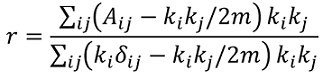

In [11]:
print('Coefifiente de Newman para internet: '+str(np.round(nx.assortativity.degree_assortativity_coefficient(jly),3)))
print('Coefifiente de Newman para Net science: '+str(np.round(nx.assortativity.degree_assortativity_coefficient(nts),3)))

Coefifiente de Newman para internet: -0.198
Coefifiente de Newman para Net science: 0.462


En la red de internet, a medida que aumenta el grado de un nodo menos conexiones tienen sus vecinos entre sí, por lo que se trata de una red <b>disortativa</b> y tanto el parámetro &mu; mostrado con anterioridad como el coeficiente de Newman tienen signo negativo.

En la red Net_science, en cambio, a medida que aumenta el grado de un nodo más conexiones tienen sus vecinos entre sí, por lo que se trata de una red <b>asortativa</b>. En este caso, tanto el parámetro &mu; mostrado con anterioridad como el coeficiente de Newman tienen signo positivo.

b. Corra el script de cálculo (puntos i-iii) para las redes Y2H y AP-MS. ¿Puede explicar lo que observa en cuanto a la asortatividad reportada?

In [13]:
#Se cargan los archivos

Y2H = nx.read_edgelist('.\\tc01_data\\yeast_Y2H.txt')
#nx.draw(Y2H, node_size=1)

APMS = nx.read_edgelist('.\\tc01_data\\yeast_AP-MS.txt')
#nx.draw(APMS)

In [14]:
#Generamos los datos para graficar ambas redes
Y2H_averageDegrees = averageDegree(degreeArray(Y2H),3)
APMS_averageDegrees = averageDegree(degreeArray(APMS),1)

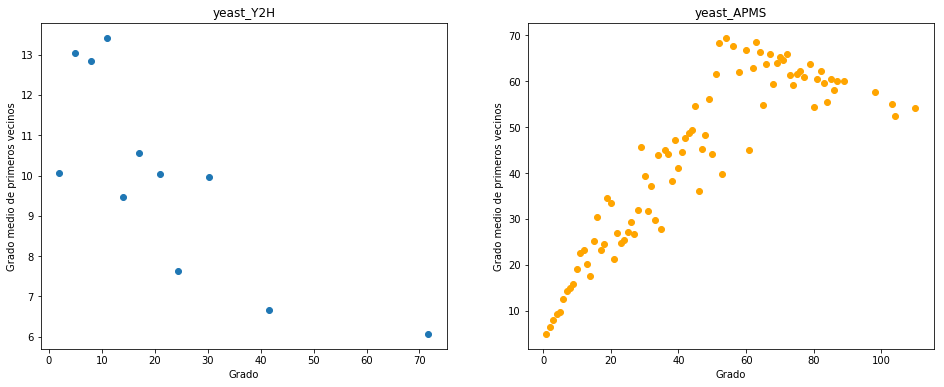

In [15]:
#grafico grado promedio de vecinos vs grado de nodo
plt.rcParams['figure.figsize'] = (16,6)

plt.subplot(121)
Y2H_x=[k[0] for k in Y2H_averageDegrees]
Y2H_y=[k[1] for k in Y2H_averageDegrees]
plt.scatter(Y2H_x, Y2H_y)

plt.title('yeast_Y2H')
plt.xlabel('Grado')
plt.ylabel('Grado medio de primeros vecinos')

plt.subplot(122)
APMS_x=[k[0] for k in APMS_averageDegrees]
APMS_y=[k[1] for k in APMS_averageDegrees]
plt.scatter(APMS_x, APMS_y, c="orange")

plt.title('yeast_APMS')
plt.xlabel('Grado')
plt.ylabel('Grado medio de primeros vecinos')

plt.show()

Se observa en los gráficos de arriba lo que parece ser una tendencia exponencial decreciente para la red Yeast_2H, y una tendencia exponencial creciente para AP_MS.

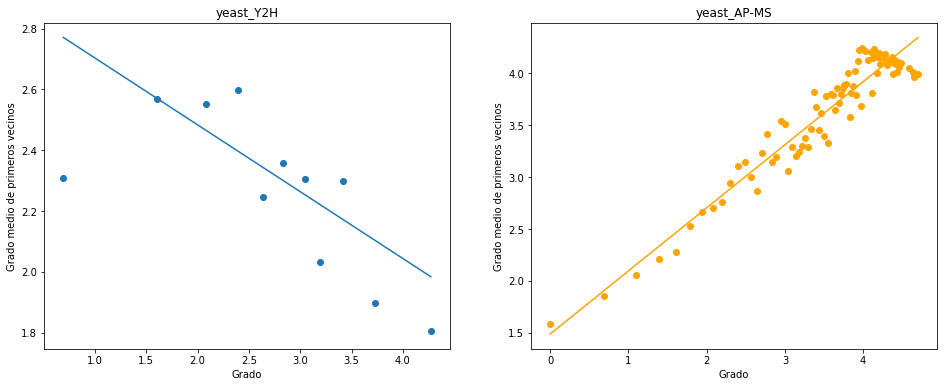

In [16]:
#grafico grado promedio de vecinos vs grado de nodo en log-log
plt.rcParams['figure.figsize'] = (16,6)

plt.subplot(121)
Y2H_x=np.log(np.array([k[0] for k in Y2H_averageDegrees]))
Y2H_y=np.log(np.array([k[1] for k in Y2H_averageDegrees]))
Y2H_fit = np.polyfit(Y2H_x, Y2H_y, 1)
plt.scatter(Y2H_x, Y2H_y)
plt.plot(np.linspace(min(Y2H_x),max(Y2H_x),1000),np.linspace(0,max(Y2H_x),1000)*Y2H_fit[0]+Y2H_fit[1])

plt.title('yeast_Y2H')
plt.xlabel('Grado')
plt.ylabel('Grado medio de primeros vecinos')

plt.subplot(122)
APMS_x=np.log(np.array([k[0] for k in APMS_averageDegrees]))
APMS_y=np.log(np.array([k[1] for k in APMS_averageDegrees]))
APMS_fit = np.polyfit(APMS_x, APMS_y, 1)
plt.scatter(APMS_x, APMS_y, c="orange")
plt.plot(np.linspace(min(APMS_x),max(APMS_x),1000),np.linspace(0,max(APMS_x),1000)*APMS_fit[0]+APMS_fit[1], c='orange')

plt.title('yeast_AP-MS')
plt.xlabel('Grado')
plt.ylabel('Grado medio de primeros vecinos')

plt.show()

In [17]:
#Ajustamos dos rectas
y_slope, y_intercept, y_r_value, y_p_value, y_std_err = stats.linregress(Y2H_x, Y2H_y)
a_slope, a_intercept, a_r_value, a_p_value, a_std_err = stats.linregress(APMS_x, APMS_y)

In [18]:
print(round(y_slope,3), round(y_r_value**2,3))
print(round(a_slope,3), round(a_r_value**2,3))

-0.184 0.491
0.607 0.925


Tras linealizar y ajustar sendas regresiones lineales, se obtuvieron coeficientes &mu; de -0.098 y 0.570 para Internet y Net_science respectivamente.

En el caso de la red Y2H, es necesario recordar que la misma es producto de la conexión pareada de proteínas puntuales, y no de la precipitación de complejos enteros. En este tipo de redes, los nodos de alto grado corresponden generalmente a proteínas promiscuas que actúan en varias vías, y cuyos interactores no tienen por qué interactuar entre sí.<br>
Siguiendo este razonamiento, puede verse que un nodo de alto grado no tiene por qué estar unido a nodos de alto o bajo grado. Si bien el ajuste lineal empleado da como resultado una pendiente negativa (lo que correspondería a una red disortativa) la pendiente es pequeña y el ajuste es pobre (R cuadrado de 0,491).

Para explicar lo que ocurre con AP_MS, por su parte, nos remitimos al ejercicio 1 del presente trabajo práctico, donde fue demostrado que el armado de la red fue producto de la conexión como cliqué de los complejos proteicos coinmunoprecipitados con las proteínas target de los anticuerpos empleados. <br>
Esto implica que, en general, un nodo de alto grado proviene de un complejo proteico grande, en el cual todos los nodos están interconectados entre sí. Siguiendo esta lógica, es fácil ver que los vecinos de los nodos de alto grado serán también de alto grado, dando como resultado una red asortativa.